# Attention as an Approximation class

This notebook follows the final chapter looking at how attention can approximate functions.

In [ ]:
import torch
import numpy as np
import torch.nn as nn
from torch.optim import optim

In [ ]:
from Attention import MHAttentionApproximator

Function defined as $2x^2 +3x +2 +e^x +2\sin(3\pi x)$

In [ ]:
#Function to be approximated by Attention
def f(x):
    a=2
    b=3
    c=2
    return a*x**2+b*x+c+torch.exp(x)+2*torch.sin(3*torch.pi*x)

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Training Attention

Below trains a multi-headed attention to approximate the above function based on different samples. This same code was used for each amount of heads with n_heads adjusted and the results saved.

In [ ]:
#Loops Through each amount of samples 
epochs=5000
nsamples=[2,5,20,50,100]
TrainingSize=10000
samplesForA=1
bsize=500
function=f
m=[]
errors=np.zeros(shape=[len(nsamples),epochs])
params=[0 for _ in range(len(nsamples))]
for i in range(len(nsamples)):
    
   
    n_sample=nsamples[i]
   
    Xtrain=torch.normal(0,1,size=[TrainingSize,n_sample,samplesForA]).to(device)
    Xtest=torch.normal(0,1,size=[TrainingSize//10,n_sample,samplesForA]).to(device)
    Ytrain=f(Xtrain[:,0]).to(device)
    Ytest=f(Xtest[:,0]).to(device)

    model=MHAttentionApproximator(d_model=32,i_dim=1,o_dim=1,Qbias=True,n_heads=32).to(device)
    if n_sample<30:
        lr=.001
    elif n_sample<60:
        lr=.0005
    else:
        lr=.00025
    optimizer=torch.optim.AdamW(model.parameters(),lr=lr)
  

    for e in range(epochs):

        batchNums=np.random.randint(0,TrainingSize,bsize)
        Xbatch=Xtrain[batchNums]
        Ybatch=Ytrain[batchNums]
        
        optimizer.zero_grad()
        pred=model(Xbatch)
        loss=torch.nn.functional.mse_loss(pred,Ybatch)
        loss.backward()
        optimizer.step()
        if e%100==0:
            print(f"Epoch {e+1}/{epochs}, Train Loss: {loss.item()}")

        
        pred=model(Xtest)
        loss=torch.nn.functional.mse_loss(pred,Ytest)
        if e%100==0:
            print(f"Epoch {e+1}/{epochs}, Test Loss: {loss.item()}")

        errors[i,e]=loss.item()
    
    params[i]=model.named_parameters()
    m.append(model)
    

Epoch 1/5000, Train Loss: 69.1169204711914
Epoch 1/5000, Test Loss: 66.582275390625
Epoch 101/5000, Train Loss: 43.3442268371582
Epoch 101/5000, Test Loss: 38.53494644165039
Epoch 201/5000, Train Loss: 27.11797332763672
Epoch 201/5000, Test Loss: 17.538665771484375
Epoch 301/5000, Train Loss: 14.714655876159668
Epoch 301/5000, Test Loss: 14.122116088867188
Epoch 401/5000, Train Loss: 12.103621482849121
Epoch 401/5000, Test Loss: 11.69788932800293
Epoch 501/5000, Train Loss: 10.055191993713379
Epoch 501/5000, Test Loss: 9.738625526428223
Epoch 601/5000, Train Loss: 10.364102363586426
Epoch 601/5000, Test Loss: 8.407837867736816
Epoch 701/5000, Train Loss: 8.056549072265625
Epoch 701/5000, Test Loss: 7.782858848571777
Epoch 801/5000, Train Loss: 12.282576560974121
Epoch 801/5000, Test Loss: 7.301953315734863
Epoch 901/5000, Train Loss: 9.525642395019531
Epoch 901/5000, Test Loss: 6.894306182861328
Epoch 1001/5000, Train Loss: 7.538280010223389
Epoch 1001/5000, Test Loss: 6.59894084930419

In [ ]:
#Ran each model for 1000 more epochs after adjusting the learning rate. This is after the original 5000
#epochs and shows why in the error graphs there is a change after 5000 epochs
epochs=1000
nsamples=[2,5,20,50,100]
TrainingSize=10000
samplesForA=1
bsize=500
function=f
errors2=np.zeros(shape=[len(nsamples),epochs])
for i in range(len(nsamples)):
    
   
    n_sample=nsamples[i]
   
    Xtrain=torch.normal(0,1,size=[TrainingSize,n_sample,samplesForA]).to(device)
    Xtest=torch.normal(0,1,size=[TrainingSize//10,n_sample,samplesForA]).to(device)
    Ytrain=f(Xtrain[:,0]).to(device)
    Ytest=f(Xtest[:,0]).to(device)

    model=m[i].to(device)
    if n_sample<30:
        lr=.001
    elif n_sample<60:
        lr=.0005
    else:
        lr=.0005
    optimizer=torch.optim.AdamW(model.parameters(),lr=lr)
  

    for e in range(epochs):

        batchNums=np.random.randint(0,TrainingSize,bsize)
        Xbatch=Xtrain[batchNums]
        Ybatch=Ytrain[batchNums]
        
        optimizer.zero_grad()
        pred=model(Xbatch)
        loss=torch.nn.functional.mse_loss(pred,Ybatch)
        loss.backward()
        optimizer.step()
        if e%100==0:
            print(f"Epoch {e+1}/{epochs}, Train Loss: {loss.item()}")

        
        pred=model(Xtest)
        loss=torch.nn.functional.mse_loss(pred,Ytest)
        if e%100==0:
            print(f"Epoch {e+1}/{epochs}, Test Loss: {loss.item()}")

        errors2[i,e]=loss.item()
    
    m[i]=model
    

Epoch 1/1000, Train Loss: 3.850576400756836
Epoch 1/1000, Test Loss: 4.508395671844482
Epoch 101/1000, Train Loss: 4.090330600738525
Epoch 101/1000, Test Loss: 3.560849189758301
Epoch 201/1000, Train Loss: 3.375990629196167
Epoch 201/1000, Test Loss: 3.5171024799346924
Epoch 301/1000, Train Loss: 2.889749765396118
Epoch 301/1000, Test Loss: 3.438953399658203
Epoch 401/1000, Train Loss: 2.6272895336151123
Epoch 401/1000, Test Loss: 4.228862285614014
Epoch 501/1000, Train Loss: 3.9808132648468018
Epoch 501/1000, Test Loss: 3.833841323852539
Epoch 601/1000, Train Loss: 3.4783854484558105
Epoch 601/1000, Test Loss: 3.9906880855560303
Epoch 701/1000, Train Loss: 3.539116621017456
Epoch 701/1000, Test Loss: 3.3016178607940674
Epoch 801/1000, Train Loss: 3.7281861305236816
Epoch 801/1000, Test Loss: 3.090843439102173
Epoch 901/1000, Train Loss: 2.731276750564575
Epoch 901/1000, Test Loss: 4.234094619750977
Epoch 1/1000, Train Loss: 1.7284165620803833
Epoch 1/1000, Test Loss: 2.423663139343261

In [279]:
errors=np.concat([errors,errors2],axis=1)

### Plot of MHA approximating our function

Below shows how approximation improves as the amount of heads increases. This same code was used for each of the heads after the results were achieved.

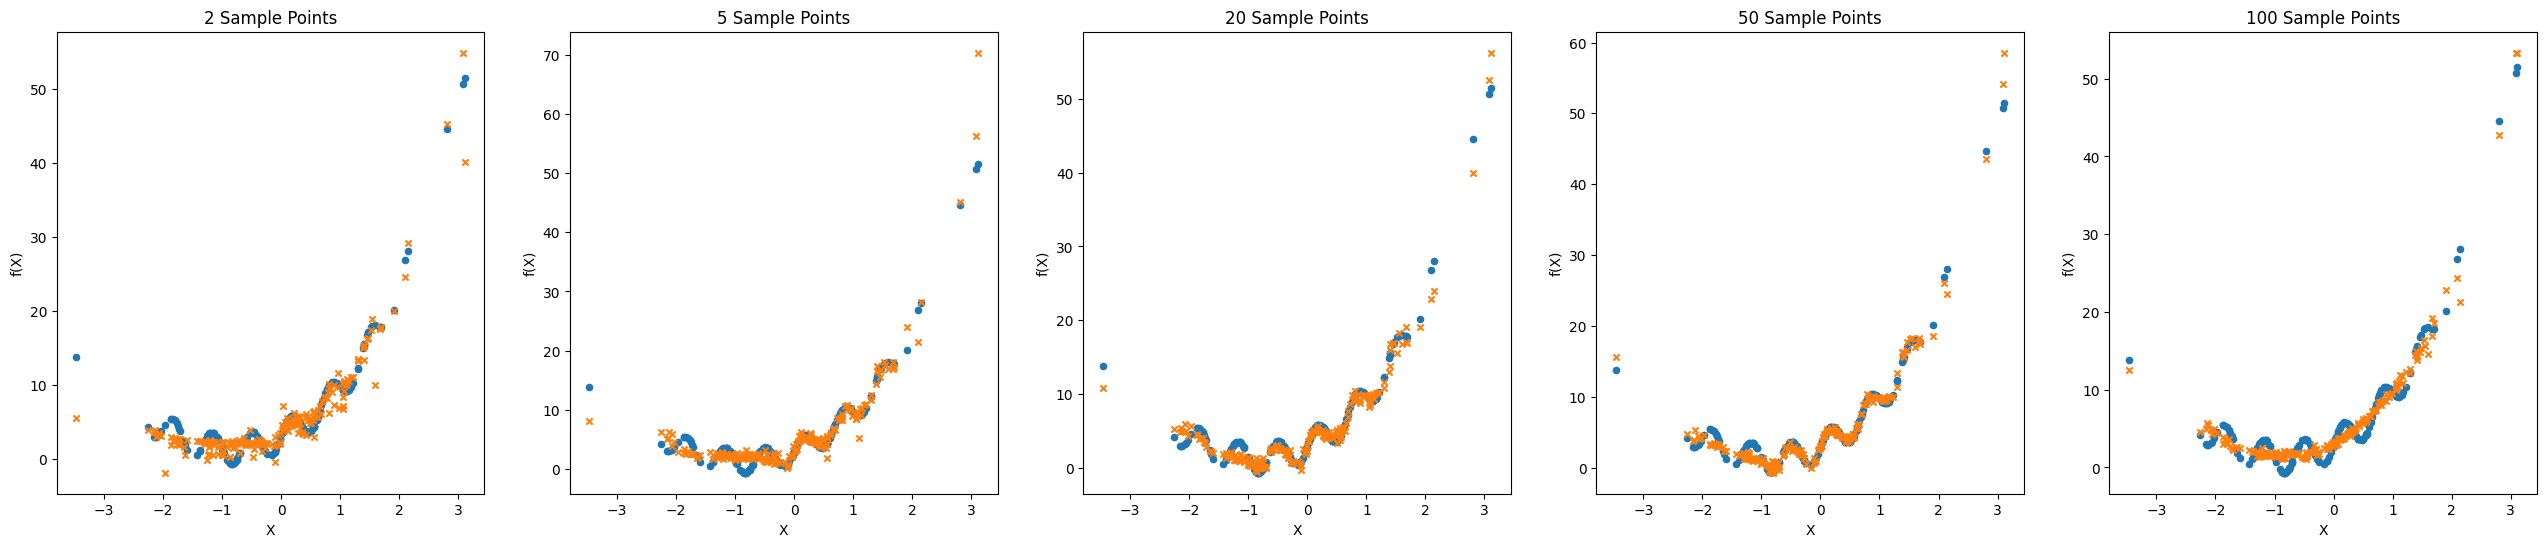

In [280]:
fig,ax=plt.subplots(nrows=1,ncols=len(m),figsize=(32,6))
ax.flatten()
for i in range(len(m)):
    model=m[i].cpu()
    import matplotlib.pyplot as plt
    X=Xtest[:200,:nsamples[i]].cpu()
    y=Ytest[:200,:nsamples[i]].cpu()
    y2=model(X).cpu().detach().numpy()
    ax[i].scatter(X[:,0],y,s=20)
    ax[i].scatter(X[:,0],y2,marker="x",s=20)
    ax[i].set_ylabel("f(X)")
    ax[i].set_xlabel("X")
    ax[i].set_title(f"{nsamples[i]} Sample Points")

fig.savefig(f"Attention/32d_32H_{nsamples[i]}P_AttApprox.png")
    

### Error plot for 32 dimensions and 32 Heads

This same code was used for each of the plots after the original training code was ran

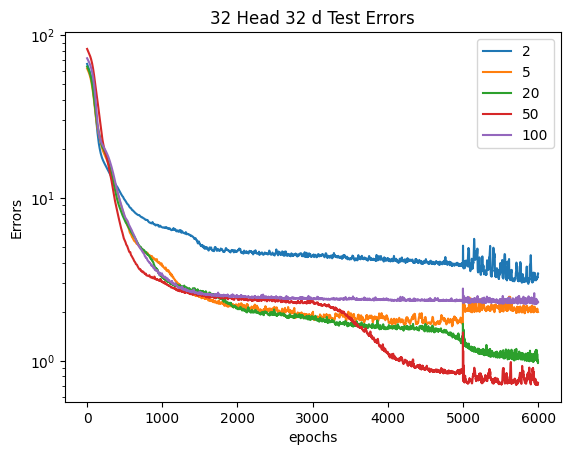

In [281]:
import matplotlib.pyplot as plt
for arr in errors:
    plt.plot(np.arange(0,len(arr)),arr)
    

plt.yscale('log')
plt.title('32 Head 32 d Test Errors')
plt.xlabel("epochs")
plt.ylabel("Errors")
plt.legend(nsamples)
plt.savefig('Attention/TestErrorsFinal/comp2F_32d_32H.png')
plt.show()
